In [2]:
import os
import zipfile

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# If the zip file is in the same directory as the working directory
zip_file_name = "tile_output.zip"
zip_file_path = os.path.join(os.getcwd(), zip_file_name)

# Open the zip file
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all the contents into the directory specified
        zip_ref.extractall(os.getcwd())
except FileNotFoundError:
    print(f"File not found. Please check the file path. Attempted path: {zip_file_path}")


Current Working Directory: /blue/eel5934/btulu/Eyosi


In [1]:
import shutil
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Define the path to the folder you want to delete
folder_path = 'tile_output'
folder_path = os.path.join(os.getcwd(), folder_path)

# Check if the folder exists
if os.path.exists(folder_path):
    # Remove the folder
    shutil.rmtree(folder_path)
    print(f"The folder at {folder_path} has been deleted.")
else:
    print(f"The folder at {folder_path} does not exist.")


Current Working Directory: /blue/eel5934/btulu/Eyosi
The folder at /blue/eel5934/btulu/Eyosi/tile_output has been deleted.


In [3]:
!nvidia-smi

Mon Apr 22 14:35:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.12             Driver Version: 535.104.12   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-80GB          On  | 00000000:07:00.0 Off |                    0 |
| N/A   27C    P0              70W / 400W |   6839MiB / 81920MiB |     36%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/blue/eel5934/btulu/Eyosi


In [6]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325
Receiving objects: 100% (325/325), 2.25 MiB | 9.36 MiB/s, done.
Resolving deltas: 100% (164/164), done.
/blue/eel5934/btulu/Eyosi/yolov9


In [4]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [5]:
!ls -la {HOME}/weights

total 402452
drwxr-sr-x 2 btulu eel5934      4096 Apr 13 20:32 .
drwxr-sr-x 7 btulu eel5934      4096 Apr 22 14:29 ..
-rw-r--r-- 1 btulu eel5934  51508261 Feb 18 07:36 gelan-c.pt
-rw-r--r-- 1 btulu eel5934 117203713 Feb 18 07:36 gelan-e.pt
-rw-r--r-- 1 btulu eel5934 103153312 Feb 18 07:36 yolov9-c.pt
-rw-r--r-- 1 btulu eel5934 140217688 Feb 18 07:36 yolov9-e.pt


In [6]:
%cd {HOME}/yolov9

/blue/eel5934/btulu/Eyosi/yolov9


## Train Custom Model

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 500 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /blue/eel5934/btulu/Eyosi/tile_output/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/blue/eel5934/btulu/Eyosi/yolov9
train: weights=/blue/eel5934/btulu/Eyosi/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/blue/eel5934/btulu/Eyosi/tile_output/data.yaml, hyp=hyp.scratch-high.yaml, epochs=500, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5 🚀 1e33dbb Python-3.9.12 torch-1.13.1 CUDA:0 (NVIDIA A100-SXM4-80GB, 81051MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=7.

In [ ]:
!python train.py \
--batch 16 --epochs 500 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /blue/eel5934/btulu/Eyosi/tile_output/data.yaml \
--weights blue_eel5934/btulu/Eyosi/yolov9/runs/train/exp10/weights/last.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml \
--resume

train: weights=blue_eel5934/btulu/Eyosi/yolov9/runs/train/exp10/weights/last.pt, cfg=models/detect/gelan-c.yaml, data=/blue/eel5934/btulu/Eyosi/tile_output/data.yaml, hyp=hyp.scratch-high.yaml, epochs=500, batch_size=16, imgsz=640, rect=False, resume=True, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5 🚀 1e33dbb Python-3.9.12 torch-1.13.1 CUDA:0 (NVIDIA A100-SXM4-80GB, 81051MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=7.5, cls=0.5, cl

In [6]:
!python train.py \
--batch 16 --epochs 600 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /blue/eel5934/btulu/Eyosi/tile_output/data.yaml \
--weights blue_eel5934/btulu/Eyosi/yolov9/runs/train/exp10/weights/last.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml \
--resume

train: weights=blue_eel5934/btulu/Eyosi/yolov9/runs/train/exp10/weights/last.pt, cfg=models/detect/gelan-c.yaml, data=/blue/eel5934/btulu/Eyosi/tile_output/data.yaml, hyp=hyp.scratch-high.yaml, epochs=600, batch_size=16, imgsz=640, rect=False, resume=True, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5 🚀 1e33dbb Python-3.9.12 torch-1.13.1 CUDA:0 (NVIDIA A100-SXM4-80GB, 81051MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=7.5, cls=0.5, cl

## Examine Training Results

In [9]:
!ls {HOME}/yolov9/runs/train/exp10/

confusion_matrix.png
events.out.tfevents.1713580880.c1006a-s23.ufhpc.2142077.0
events.out.tfevents.1713640918.c1006a-s23.ufhpc.2605466.0
events.out.tfevents.1713640975.c1006a-s23.ufhpc.2610327.0
events.out.tfevents.1713726343.c1006a-s23.ufhpc.3927199.0
events.out.tfevents.1713811098.c1103a-s35.ufhpc.3278023.0
events.out.tfevents.1713811181.c1103a-s35.ufhpc.3284830.0
F1_curve.png
hyp.yaml
opt.yaml
P_curve.png
PR_curve.png
R_curve.png
results.csv
results.png
train_batch0.jpg
train_batch1.jpg
train_batch2.jpg
val_batch0_labels.jpg
val_batch0_pred.jpg
val_batch1_labels.jpg
val_batch1_pred.jpg
val_batch2_labels.jpg
val_batch2_pred.jpg
weights


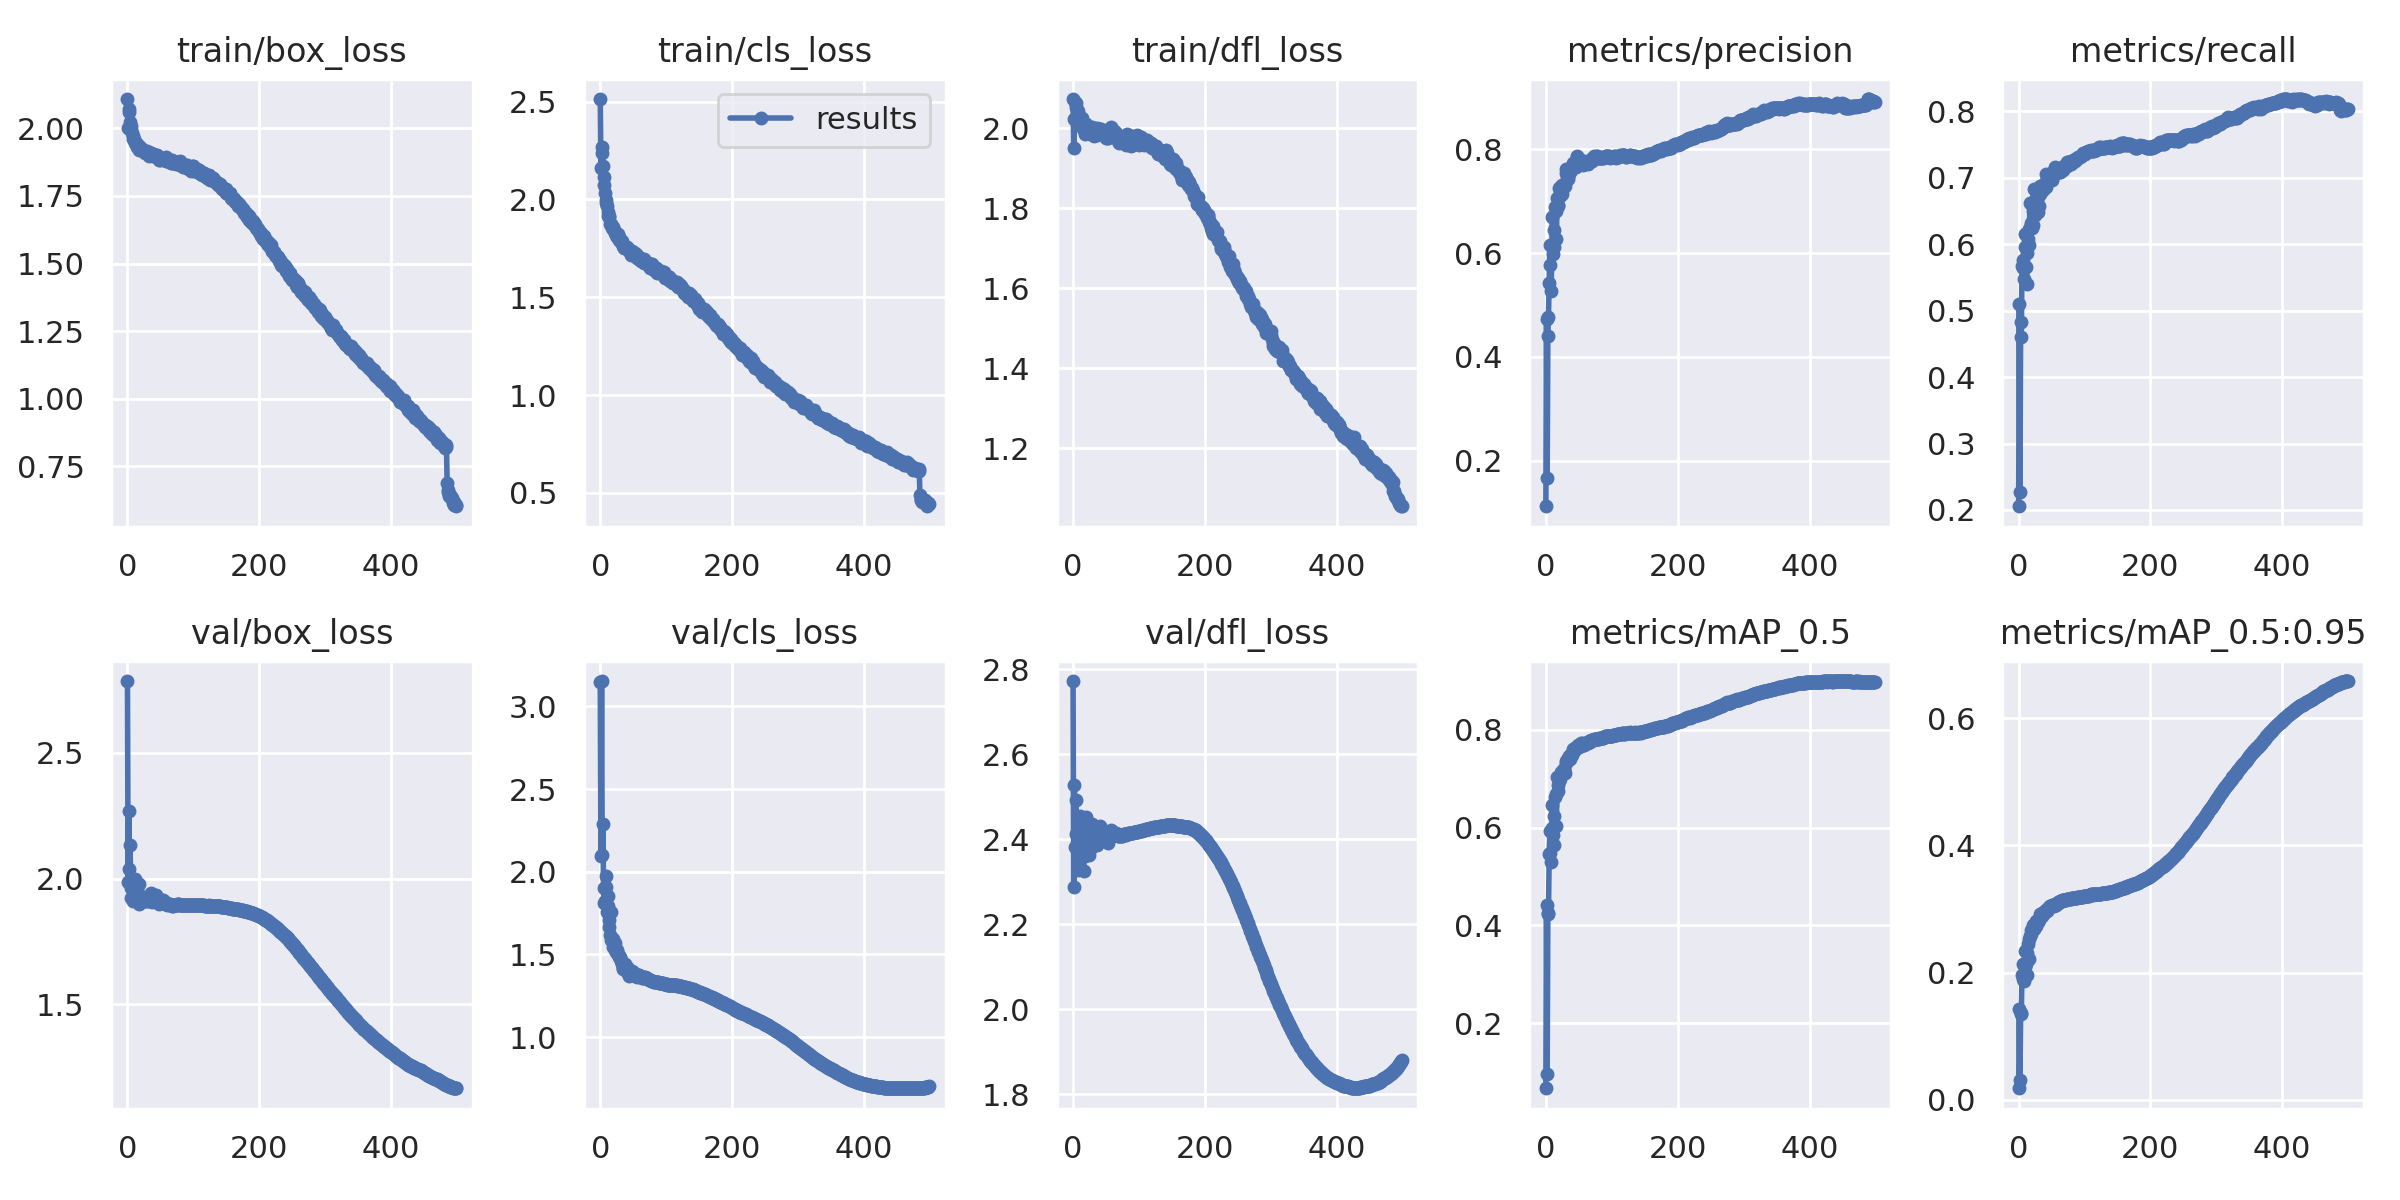

In [10]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp10/results.png", width=1000)

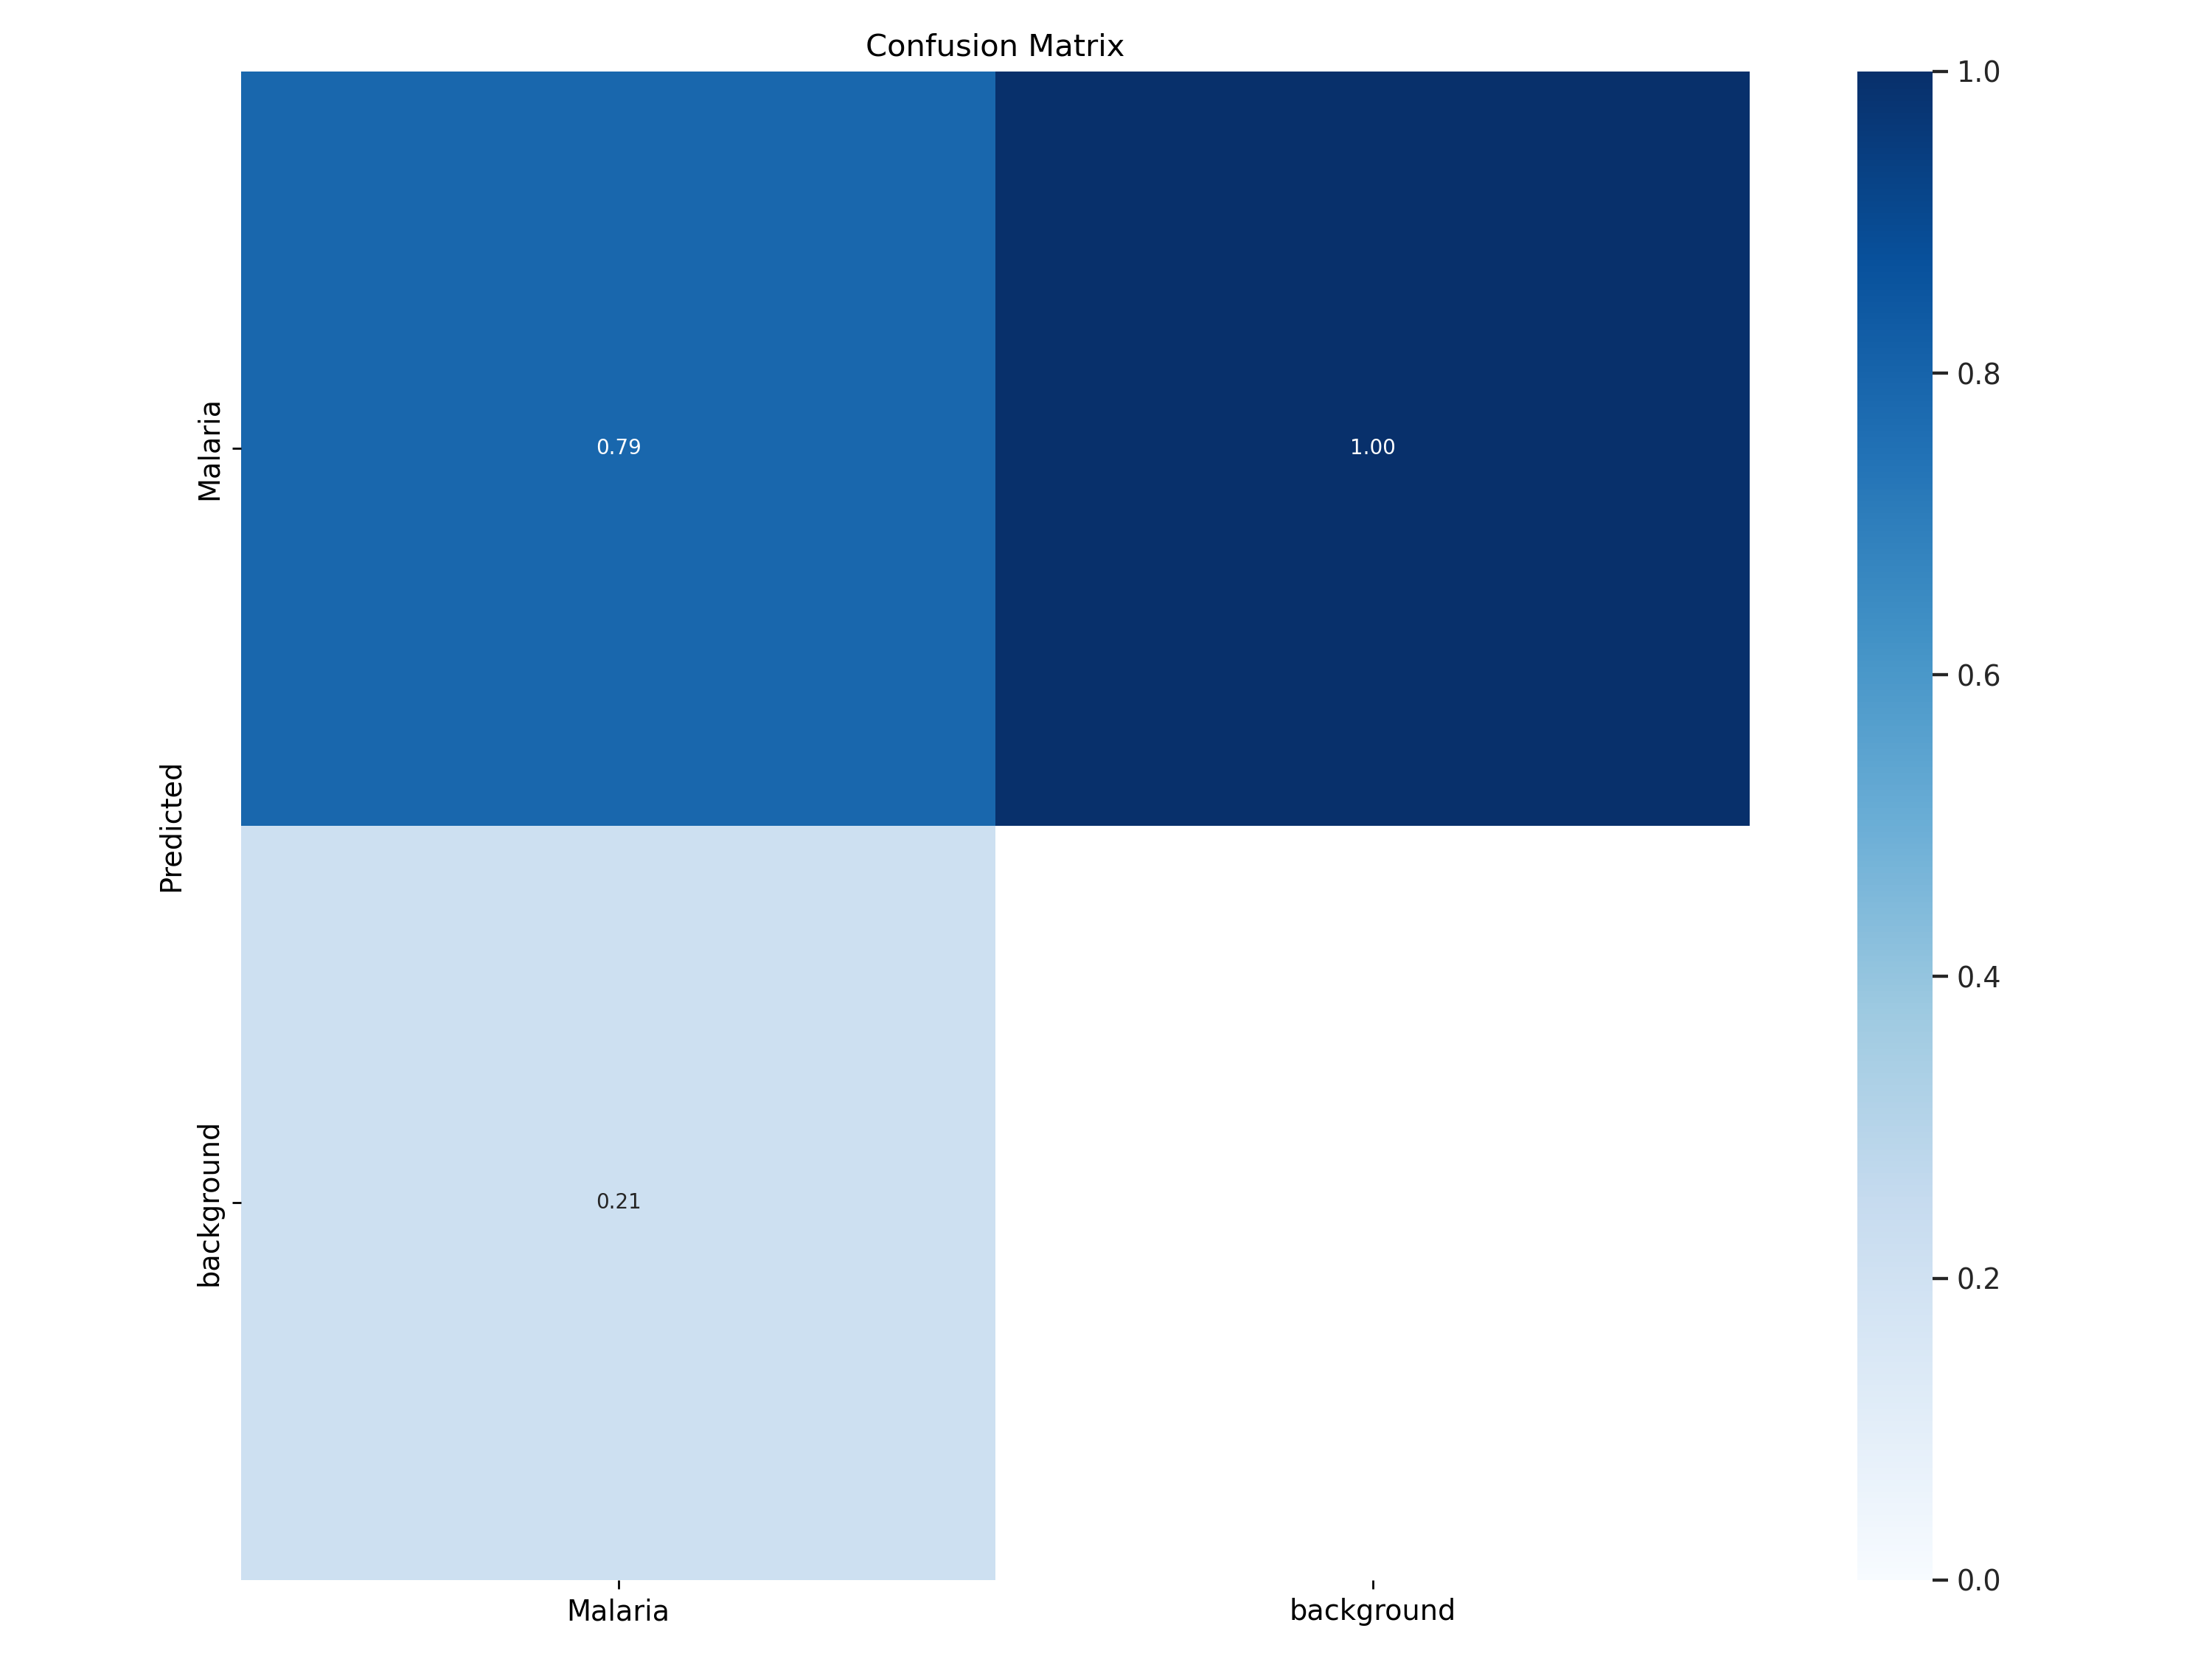

In [11]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp10/confusion_matrix.png", width=1000)

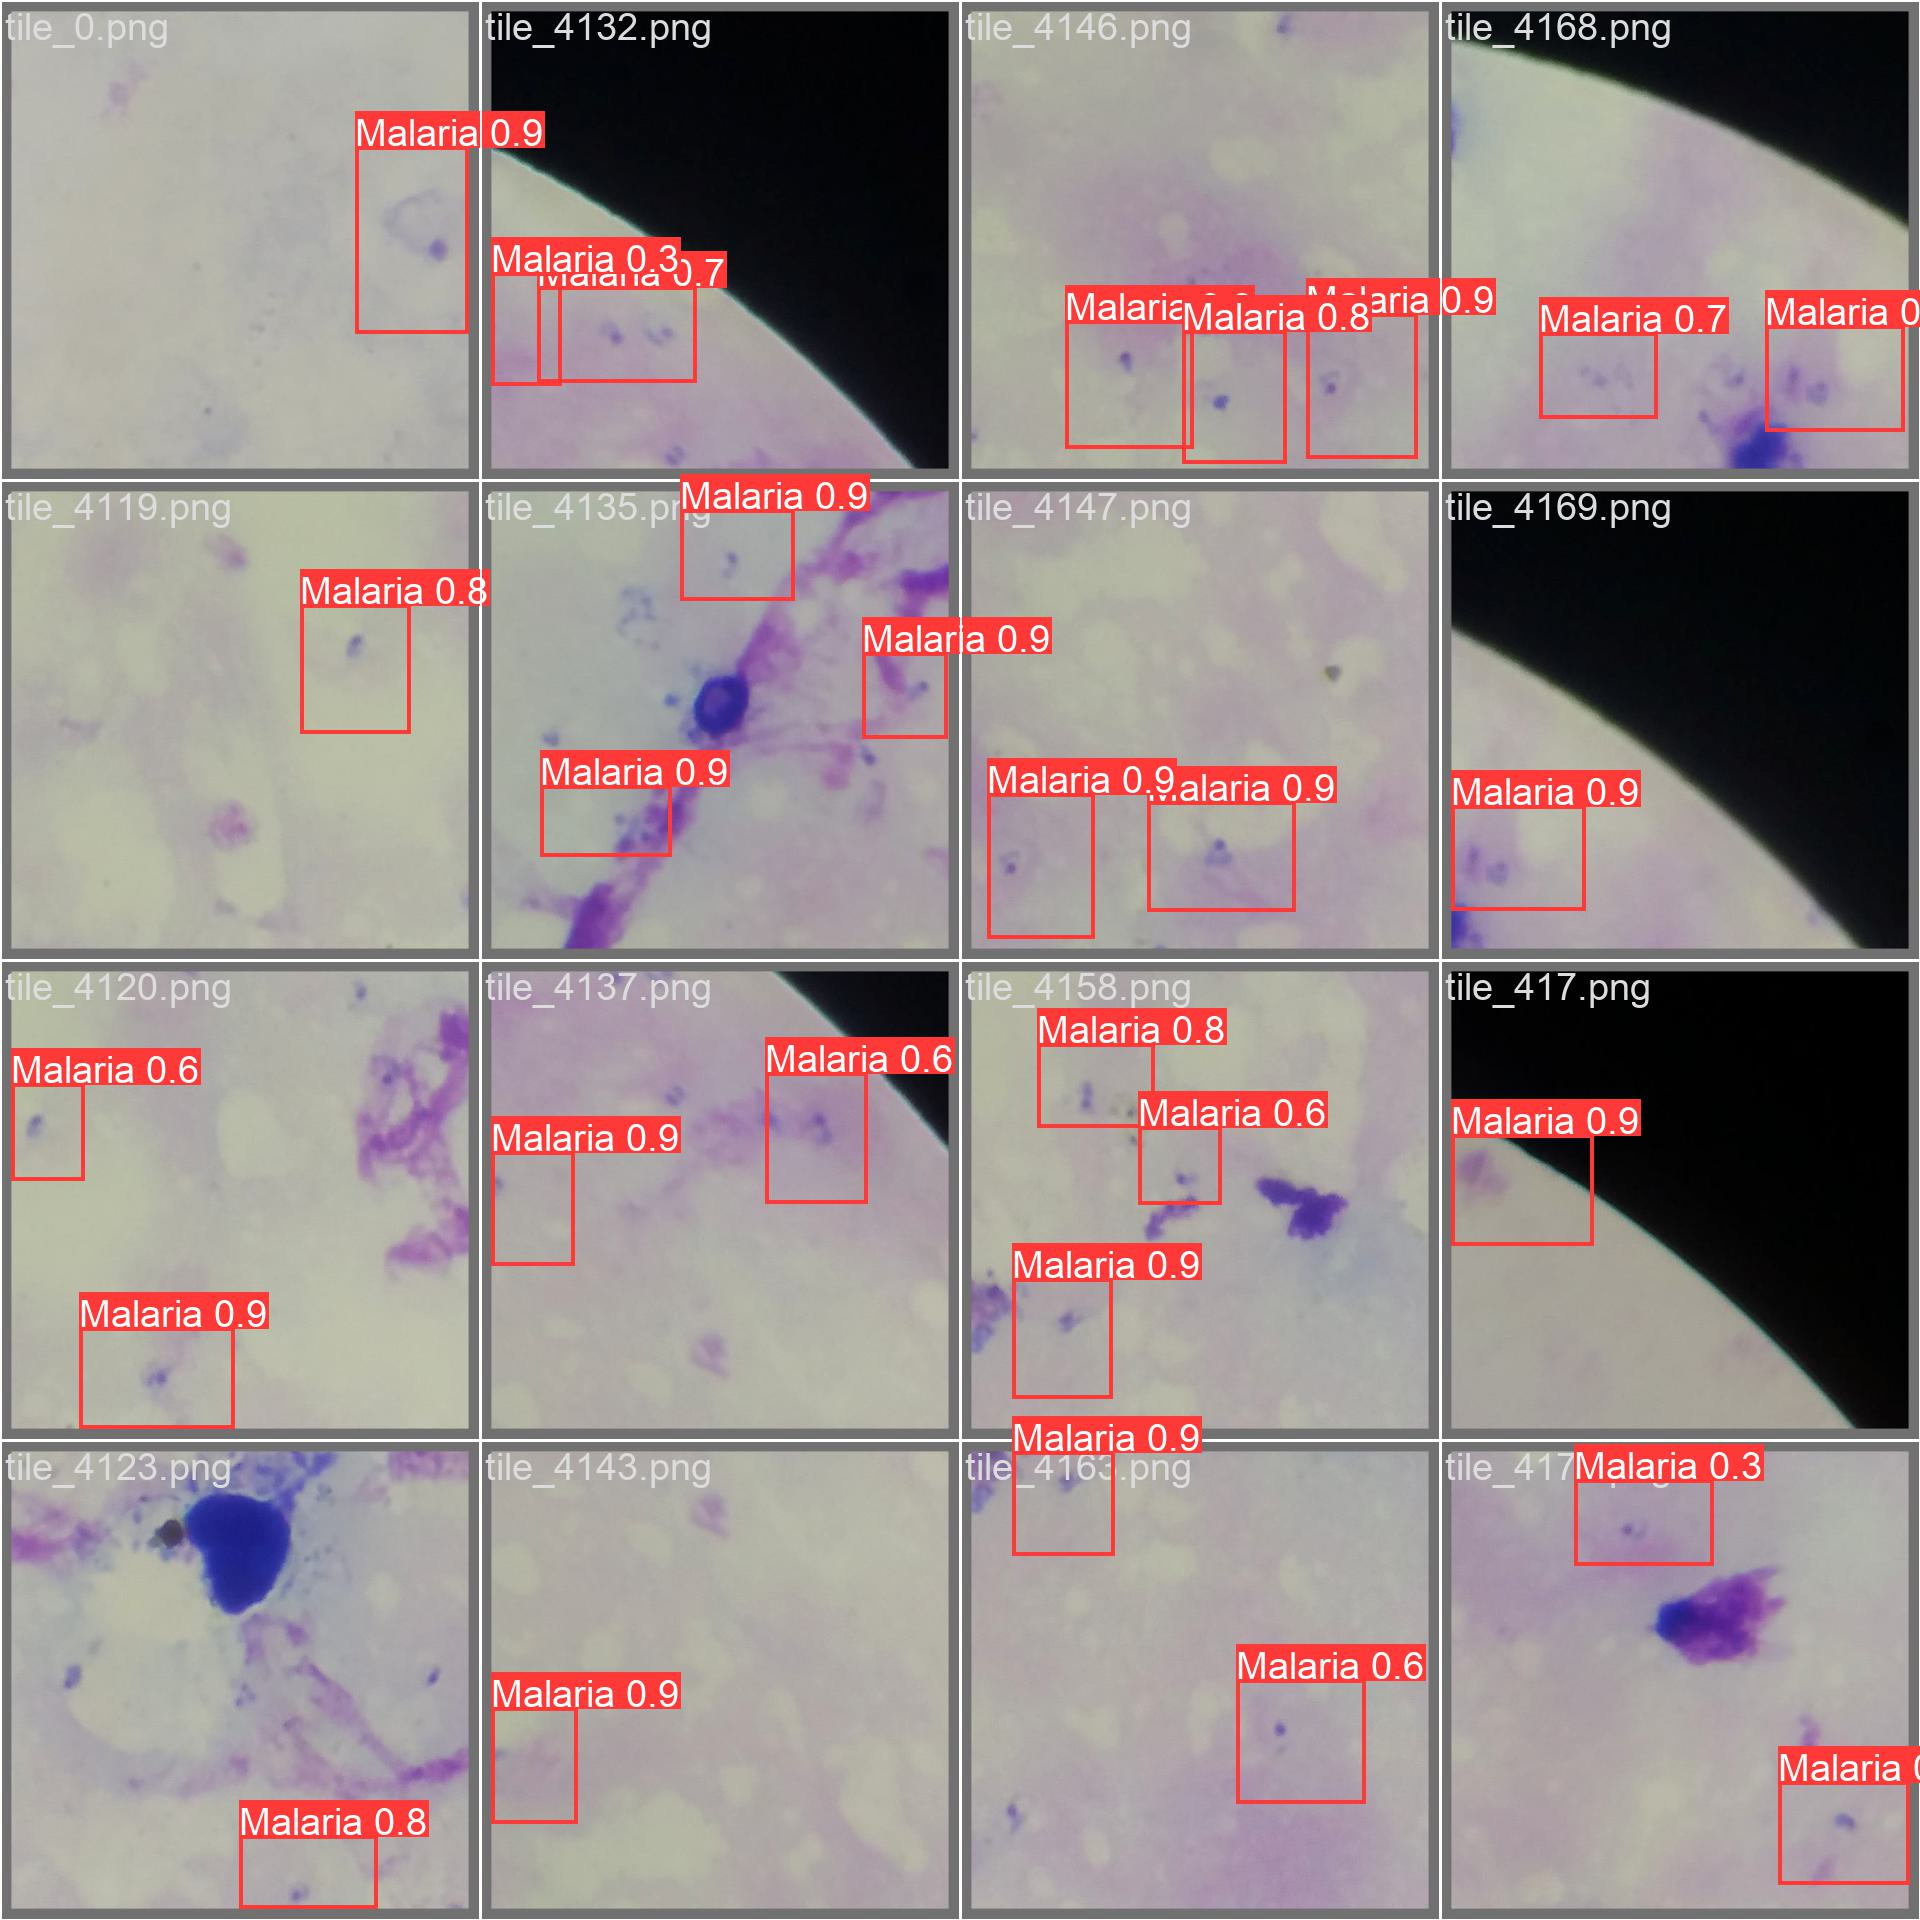

In [12]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp10/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [13]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data /blue/eel5934/btulu/Eyosi/tile_output/data.yaml \
--weights {HOME}/yolov9/runs/train/exp10/weights/best.pt

/blue/eel5934/btulu/Eyosi/yolov9
val: data=/blue/eel5934/btulu/Eyosi/tile_output/data.yaml, weights=['/blue/eel5934/btulu/Eyosi/yolov9/runs/train/exp10/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.9.12 torch-1.13.1 CUDA:0 (NVIDIA A100-SXM4-80GB, 81051MiB)

Fusing layers... 
Model summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /blue/eel5934/btulu/Eyosi/tile_output/val/labels... 4045 images, 0
val: New cache created: /blue/eel5934/btulu/Eyosi/tile_output/val/labels.cache
                 Class     Images  Instances          P          R      mAP50   
                   all       4045       5954      0.894      0.803      0.896      0.659
Speed: 0.2ms pre-proce

In [14]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp10/weights/best.pt \
--source /blue/eel5934/btulu/Eyosi/tile_output/test/images

detect: weights=['/blue/eel5934/btulu/Eyosi/yolov9/runs/train/exp10/weights/best.pt'], source=/blue/eel5934/btulu/Eyosi/tile_output/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLO requirement "albumentations>=1.0.3" not found, attempting AutoUpdate...
ERROR: Could not install packages due to an OSError: [Errno 16] Device or resource busy: '.nfs0000000141c12cf700000046'

requirements: ❌ Command 'pip install "albumentations>=1.0.3"  ' returned non-zero exit status 1.
YOLOv5 🚀 1e33dbb Python-3.9.12 torch-1.13.1 CUDA:0 (NVIDIA A100-SXM4-80GB, 81051MiB)

Fusing layers... 
Model summary: 467 layers, 25411731 parameter

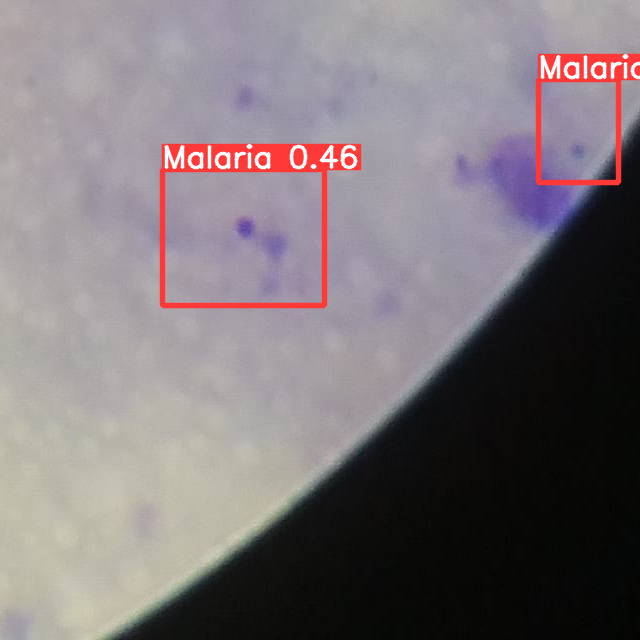

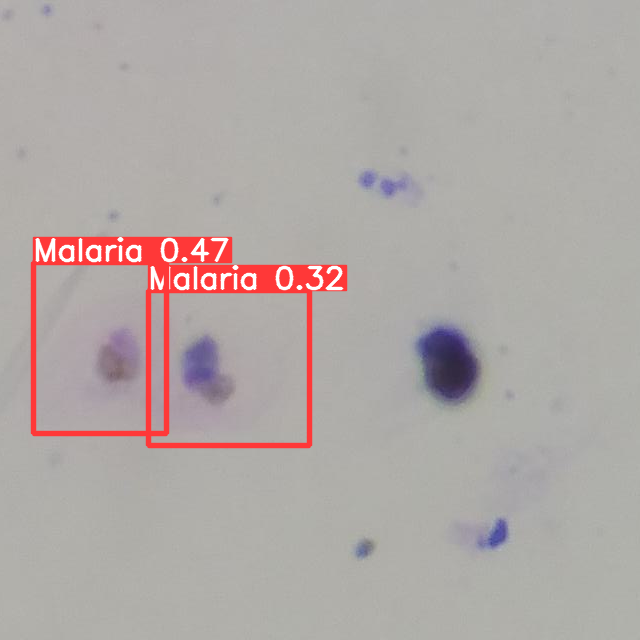

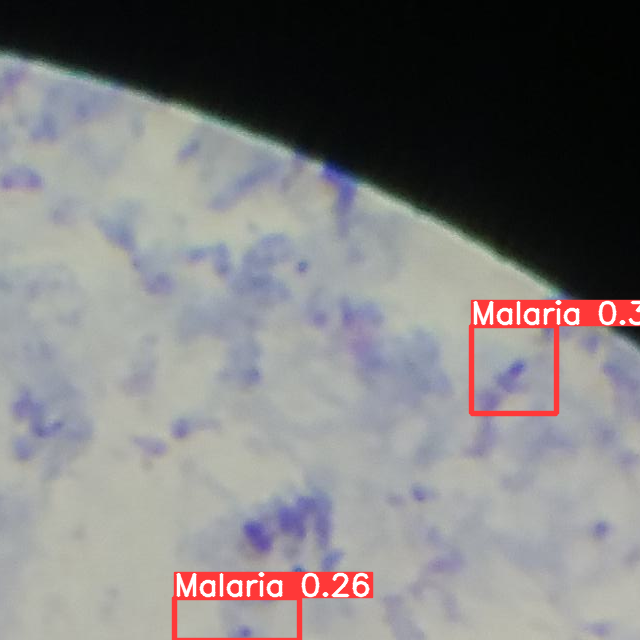

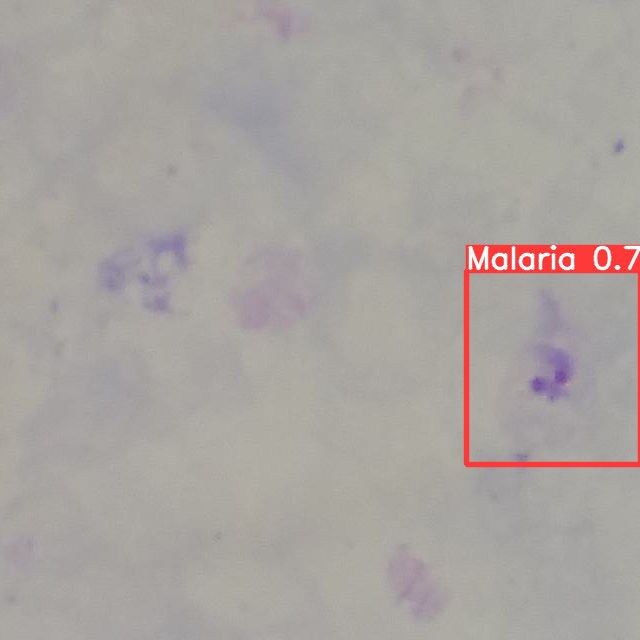

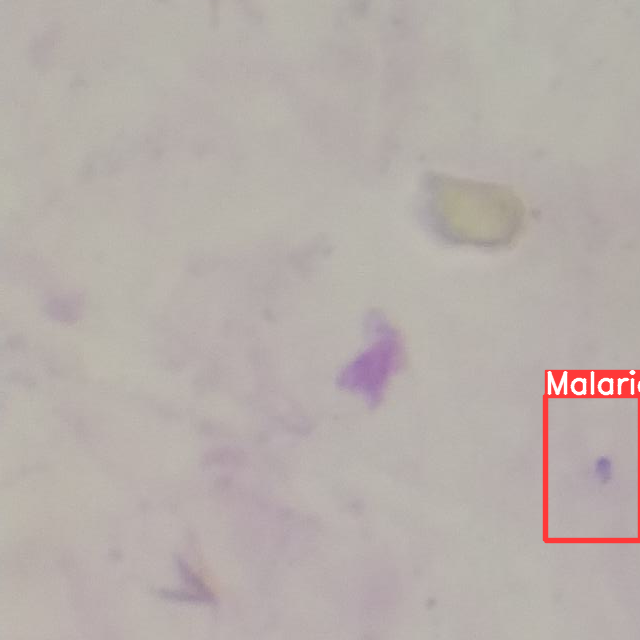

In [16]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp2/*.png')[:5]:
      display(Image(filename=image_path, width=600))